In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import *
from sklearn.cluster.bicluster import SpectralCoclustering
from bokeh.models import HoverTool, ColumnDataSource
from itertools import product

In [2]:
whisky = pd.read_csv('whiskies.txt')
whisky["Region"] = pd.read_csv('regions.txt')

In [3]:
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [4]:
whisky.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands


In [5]:
flavors = whisky.iloc[:, 2:14]
flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
5,2,3,1,1,0,1,1,1,0,1,1,2
6,0,2,0,0,0,1,1,0,2,2,3,3
7,2,3,1,0,0,2,1,2,2,2,2,1
8,2,2,1,0,0,1,0,0,2,2,2,2
9,2,3,2,1,0,0,2,0,2,1,2,1


In [6]:
corr_flavors = pd.DataFrame.corr(flavors)

In [7]:
print(corr_flavors)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

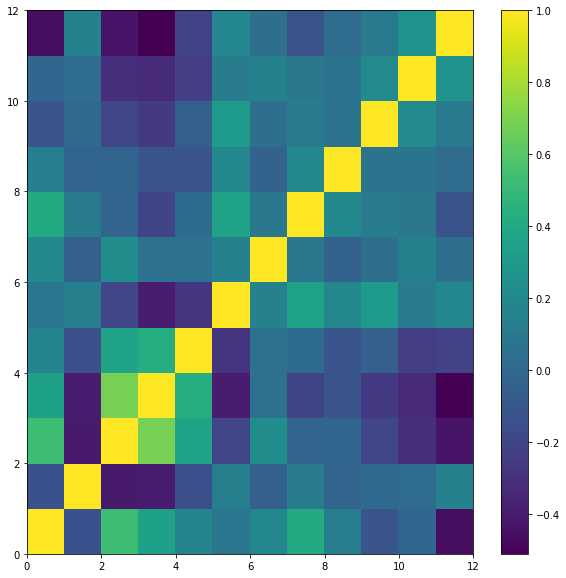

In [8]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavors.pdf")

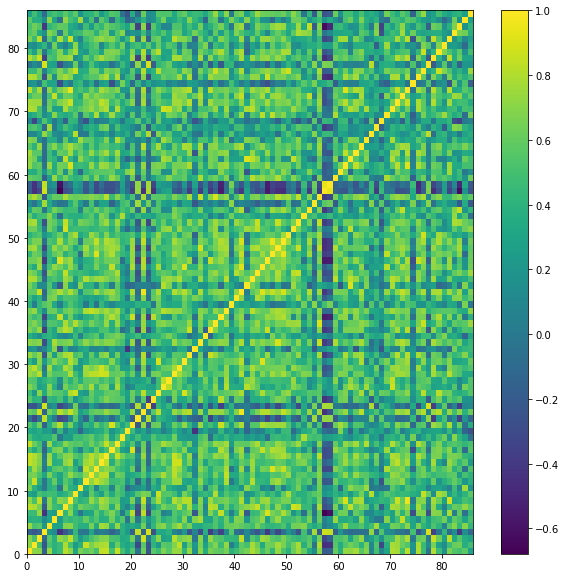

In [9]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.colorbar()
plt.savefig("corr_whisky.pdf")

In [10]:
model = SpectralCoclustering(n_clusters=6, random_state=0)

In [11]:
model.fit(corr_whisky)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=6,
           n_init=10, n_jobs=1, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

In [12]:
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

In [13]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4,
       3, 4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 0, 5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2,
       1, 5, 1, 0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0],
      dtype=int32)

In [15]:
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)
whisky = whisky.iloc[np.argsort(model.row_labels_)]
whisky = whisky.reset_index(drop=True)

In [16]:
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())

In [17]:
correlations = np.array(correlations)

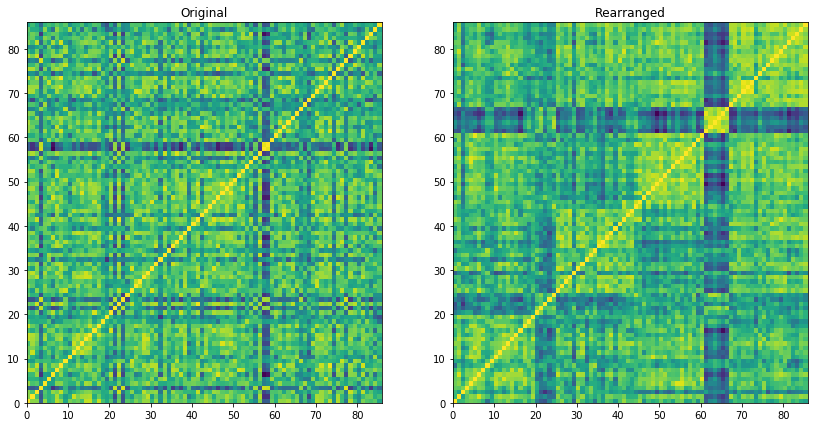

In [18]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title('Original')
plt.axis('tight')
plt.subplot(122)
plt.pcolor(correlations)
plt.title('Rearranged')
plt.axis('tight')
plt.savefig('correlations.pdf')

In [34]:
# Let's plot a simple 5x5 grid of squares, alternating in color as red and blue.

plot_values = [1, 2, 3, 4, 5]
plot_colors = ["red", "blue"]

# How do we tell Bokeh to plot each point in a grid?  Let's use a function that
# finds each combination of values from 1-5.
from itertools import product

grid = list(product(plot_values, plot_values))
print(grid)

# The first value is the x coordinate, and the second value is the y coordinate.
# Let's store these in separate lists.

xs, ys = zip(*grid)
print(xs)
print(ys)

# Now we will make a list of colors, alternating between red and blue.

colors = [plot_colors[i % 2] for i in range(len(grid))]
print(colors)

# Finally, let's determine the strength of transparency (alpha) for each point,
# where 0 is completely transparent.

alphas = np.linspace(0, 1, len(grid))

# Bokeh likes each of these to be stored in a special dataframe, called
# ColumnDataSource.  Let's store our coordinates, colors, and alpha values.

source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
        "alphas": alphas,
    }
)
# We are ready to make our interactive Bokeh plot!

output_file("Basic_Example.html", title="Basic Example")
fig = figure(tools="hover, save")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors", alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
}
show(fig)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)
['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red']


In [38]:
cluster_colors = ["red", "orange", "green", "blue", "purple", "gray"]
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]

region_colors = dict(zip(regions, cluster_colors))
region_colors

{'Speyside': 'red',
 'Highlands': 'orange',
 'Lowlands': 'green',
 'Islands': 'blue',
 'Campbelltown': 'purple',
 'Islay': 'gray'}

In [39]:
distilleries = list(whisky.Distillery)
correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if correlations[i, j] < 0.70:                      # if low correlation,
            correlation_colors.append('white')         # just use white.
        else:                                          # otherwise,
            if whisky.Group[i] == whisky.Group[j]:                 # if the groups match,
                correlation_colors.append(cluster_colors[whisky.Group[i]]) # color them by their mutual group.
            else:                                      # otherwise
                correlation_colors.append('lightgray') # color them lightgray.

In [40]:
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": correlation_colors,
        "alphas": correlations.flatten(),
        "correlations": correlations.flatten(),
    }
)

output_file("Whisky Correlations.html", title="Whisky Correlations")
fig = figure(title="Whisky Correlations",
    x_axis_location="above", tools="hover,save",
    x_range=list(reversed(distilleries)), y_range=distilleries)
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3

fig.rect('x', 'y', .9, .9, source=source,
     color='colors', alpha='correlations')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

In [44]:
points = [(0,0), (1,2), (3,1)]
xs, ys = zip(*points)
colors = ["red", "blue", "green"]

output_file("Spatial_Example.html", title="Regional Example")
location_source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
    }
)

fig = figure(title = "Title",
    x_axis_location = "above", tools="hover, save")
fig.plot_width  = 300
fig.plot_height = 380
fig.circle("x", "y",size=10, source=location_source, color='colors', line_color=None)

hover = fig.select(dict(type = HoverTool))
hover.tooltips = {
    "Location": "(@x, @y)"
}
show(fig)

In [50]:
def location_plot(title, colors):
    output_file(title + ".html")
    location_source = ColumnDataSource(
        data={
            "x": whisky[" Latitude"],
            "y": whisky[" Longitude"],
            "colors": colors,
            "regions": whisky.Region,
            "distilleries": whisky.Distillery
        }
    )

    fig = figure(title=title,
                 x_axis_location="above", tools="hover, save")
    fig.plot_width = 400
    fig.plot_height = 500
    fig.circle("x", "y", size=9, source=location_source, color='colors', line_color=None)
    fig.xaxis.major_label_orientation = np.pi / 3
    hover = fig.select(dict(type=HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }
    show(fig)


region_cols = [region_colors[i] for i in list(whisky["Region"])]
location_plot("Whisky Locations and Regions", region_cols)

In [51]:
region_cols = [region_colors[i] for i in list(whisky.Region)]
classification_cols = [cluster_colors[i] for i in list(whisky.Group)]

location_plot("Whisky Locations and Regions", region_cols)
location_plot("Whisky Locations and Groups", classification_cols)